# Лекция 2. Процесс обучения нейронных сетей

### Основные выводы прошлой лекции

Разобрали несколько типовых методов в задачах компьютерного зрения:
image classification, object, detection, segmentation, OCR, keypoint, pose estimation, object tracking, представление фото в терминах матриц(тензоров), цветовые схемы, и простые математические методы обработки изображений.

Базовые понятия: NN (natural network) – нейронные сети, CNN (convolution natural network) – сверхточные нейронные сети, RGB/BGR (Red, Blue, Green) – распространённые цветовое пространство, HSV (hue, saturation, value) – цветовое пространство, Learning rate (Lr) - скорость обучения, Backpropagation - обратное распространение ошибки.

Базовые основы нейросетей: Линейная классификация, Логистическая регрессия, Граф вычислений производных, Пример одного нейрона, Цепное правило и граф производных.

### Линейная классификация

$x = (x_1,x_2)$ - признаки и $y∈\{+1, −1\}$ - метки.

Найти разделяющую гиперплоскость между метками. В данном случае это 
просто линия, которая задается 3-мя коэффициентами:
$$d(x) = w_0 + w_1 x_1 + w_2 x_2$$

Нам нужно найти три коэффициента $w$, которые зададут линию. Далее мы можем взять точку $х$ и понять, где она находится относительно линии: выше или ниже. Для этого нам нужно узнать знак линейной комбинации. Вектор весов $w$ задает нормаль к нашей линии, то есть он перпендикулярен ей $$a(x) = sign(d(x))$$

Линейная комбинация — это скалярное произведение и длина проекции 
какого-нибудь другого вектора на наш вектор $w$.

Проекция становится разных знаков. Из этих соображений мы 
делаем линейный классификатор. Настроить линейный классификатор — значит, найти эти коэффициенты. 

### Логистическая регрессия

Она тоже решает задачу классификации, но в конце **применяется не 
функция знака, а сигмоидная функция. Сигмоида превращает длину проекции линейной комбинации в уверенность (вероятность).**

Если длина проекции 0 (точка ровно на красной линии) , то сигмоида дает 0,5.  Логистическая регрессия предсказывает вероятность положительного класса. Вероятность отрицательного будет единица минус предсказанная вероятность положительного класса. 

### Другой пример

Представим, что у нас есть следующая задача:

$$-------$$
$$-+++-$$
$$ -+-$$
$$  -$$

Чтобы решить подобную задачу, мы можем "подпереть" треугольник **тремя линиями** и сделать алгоритм, используя только логистическую регрессию.

$$d_i(x) = w_0i + w_1i x_1 + w_2i x_2$$

Cейчас у нас есть 
коэффициенты трех логистических регрессий, каждая из которых решает 
свою маленькую подзадачу. 


Теперь возьмем какую-нибудь точку и посмотрим 
Какие три предсказания дают эти линии в этой точке:

$$z_i = \sigma(d_i) $$
$$(x_1, x_2) \rightarrow (z_1, z_2, z_3)$$

Полученные коэффициенты мы можем рассматривать как новые координаты. 
Если у нас будет три признака, каждый из которых говорит, где мы находимся относительно каждой стороны треугольника. 
Давайте возьмем наш целевой признак y, добавим его в нашу новую таблицу, где наши новые признаки с предсказаниями, и попробуем решить ее с новыми признаками с помощью линейной логистической регрессии. На новой выборке получим логистическую регрессию:

$$a(x) = \sigma(w_0 + w_1 z_1(x) + w_2 z_2(x) + w_3 z_3(x))$$

Теперь она дает нам некоторые коэффициенты и **взвешивает** уже предсказания. То, что мы получили — **простейшая нейросеть**.

При этом на нашу сложную комбинацию функций можно посмотреть как на **граф вычислений**. У графа есть вершины и каждая **вершина** — вычисляемое значение. Также есть **ребра** — зависимости, которые имеют направления (на картинке ниже это стрелочки). Ребро идет от $х_1$ к $z_1$ в случае, если нам необходим $х_1$, чтобы вычислить значение $z_1$. Это граф зависимости между какими-то вычисляемыми значениями:

Граф соответствует комбинации наших функций. Такой граф называют **многослойным персептроном** и здесь уже можно видеть некоторые слои:
* входной слой (признаки)
* скрытый слой (нейроны) 
* выходной слой (предсказания)

MLP — это простейший пример нейросети:

Архитектура MLP: количество слоев, количество нейронов в каждом слое, какую активацию использовать

Один слой в MLP называют: Dense layer (плотный), Fully-connected layer (полно-связный)

Функция потерь, обычно, дифференцируемая. Если представить, что у нас есть параметр w, который нужно оптимизировать, то мы можем начать с любой точки (**initial weight**) и посчитать в ней производную. В данном случае это наклона касательной.

Алгоритм вычисления производной в графе(a по b):
1. Находим непосещённый путь из a в b;
2. Перемножаем значения на ребрах в пути;
3. Добавляем в сумму;
4. Возвращаемся к п.1.


Эффективный способ вычисления всех производных называется back-propagation (обратное распространение ошибки).

### Back-propagation (Back-prop)

В Back-propogation есть два прохода: прямой и обратный. Те производные, которые считает обратный граф — нужно считать в определенной точке. Именно для этого нужен прямой проход — он расчитает аргументы всех этих производных:

Дополнительные материалы: **Step-by-step backpropagation example**

# Разбор элементов обучения:
1. Функции активации
2. Инициализация
3. Batch нормализация
4. Dropout регуляция
5. Градиентный спуск
6. Стохастический градиентный спуск
7. Матричные операции

## 1. Функции активации

Делятся на линейные и нелинейные функции активации.

1. $$\sigma = \frac{1}{1+e^{-x}}$$

Сигмоида - возрастающая нелинейная функция, имеющая форму  буквы «S». В нейронных сетях она используется потому, что позволяет усиливать  слабые сигналы. **Недостатки**: нейроны с сигмоидой могут насыщаться и приводить к угасающим градиентам; Не центрированы в нуле;  Дорого вычислять.

2. $$tanh = \frac{2}{1+e^{-2x}}-1$$

Преимущество $tanh$ состоит в том, что отрицательные входные данные будут отображаться строго отрицательными, а нулевые входные данные будут отображаться вблизи нуля. **Характеристики**: Центрирована в нуле, но все ещё как сигмоида.

3. $$f(x) = max(0, x)$$ 

ReLU (rectified linear unit) используется практически во всех свёрточных нейронных сетях или для deep learning. **Характеристики**: Быстро считается; Градиенты не угасают при $х > 0$; Не центрирована в нуле ; Если не было активации — не будет обновления. 

4. $$f(x) = max(ax, x)$$ 

Leaky ReLU является попыткой решить проблему выхода из строя ReLU. **Характеристики**: Всегда будут обновления; Примерно центрирована в нуле ; $а ≠ 1$.

5. $$f(x) = \begin{cases} x, &\text{$x \geqslant 0$}\\ \alpha(e^x -1), &\text{$x < 0$ } \end{cases} $$ 
 
ELU (Exponential Linear Unit): быстрее сводит к нулю и даёт более точные результаты. **Характеристики**: Примерно центрирована в нуле; Сходимость быстрее ReLU.


## 2. Инициализация весов

Нейронные сети нельзя инициализировать нулевыми весами, т.к. в этом 
случае появляется **эффект симметрии** и, как следствие, сеть станет 
менее мощной.

1. **Нейрон и дисперсия до активации.** Если у каждого входа нейросети **среднее равно 0**, и мы генерируем веса независимо от входов, то это нам гарантирует, что среднее нейрона до активации тоже будет равно 0. 

2. Дисперсия суммы некоррелированных величин — это сумма дисперсий, слагаемые некоррелированы, потому что веса, которые мы генерируем, независимы.

3. **Сходимость.** Гиперболический тангенс для маленьких функций (около 0) похож на линейную функцию, то есть наши ранние выкладки примерно верны, и это означает, что т. к. мы гарантируем одинаковую дисперсию на  разных слоях нейросети, то выход будет распределен примерно одинаково после применения функции активации и, следовательно, градиенты будут в примерно одинаковом масштабе — этот факт позволит ускорить сходимость.

## 3. Batch нормализация

После инициализации и запуска back-propagation нет гарантий, что дисперсия не будет расти. Для нормирования выходов нейронов (до и после активации) можно использовать Batch нормализацию. 

Batch нормализация пытается **нормировать каждый выход нейрона таким образом, чтобы у него были нулевое среднее и фиксированная дисперсия**.
Экспоненциальное сглаживание работает следующим образом: когда мы получаем среднее по батчу и дисперсию (Var) по батчу, мы **добавляем их в накопитель с некоторым весом**, а старое значение в накопителе немного **дискаунтируем**.

**γ** и **β** нужны для масштабирования и сдвига активации — нейросети может быть полезно иметь, например,  не единичную дисперсию для какого-то нейрона, а большую, что поможет ей сойтись лучше. Линейная комбинация каких-то других входов легко дифференцируется, поэтому эти коэффициенты можно добавить в **back-propagation**, по ним будут считаться градиенты, и они будут автоматически подобраны.

## 4. Dropout регуляризация

Dropout регуляризация на каждом шаге back-propagation семплирует сеть и с вероятностью $р$ оставляет каждый нейрон, но с вероятность $1 - р$ заменяет его на $0$. Таким образом сеть подстраивается по частям.

## 5. Влияние learning rate и масштаба признаков на сходимость

В зависимости от того, какую величину шага в градиентном спуске 
*learning rate* вы выберете (большую или маленькую), вариации 
градиентного спуска будут выглядеть по-разному:

Если **learning rate**:
1. **слишком большой**, это означает, что сначала оптимизация была, но остановилась и качество становится хуже, мы **выходим из оптимальной точки**.
2. **слишком маленький**, то **обучение слишком медленное**.
3. **недостаточно большой**, то поначалу обучение идёт отлично, а потом мы застреваем и не двигаемся дальше.
4. **оптимальный**, то мы **обучаемся быстро вначале и к концу мы выходим на оптимальную точку**.

Почему стоит снижать *learning rate* с каждой итерацией? Если уменьшить 
*learning rate*, когда вы увидели, что обучение больше не происходит, то 
сеть еще чуть-чуть доучится.

Проблема градиентного спуска — он застревает в локальных минимумах.

## 6. Стохастический градиентный спуск (SGD)

**Стохастический градиентный спуск (SGD)** является итерационным методом оптимизации с дифференцируемой целевой функцией. Суть градиентного спуска — **минимизировать функцию, делая небольшие шаги в сторону наискорейшего убывания функции**.

+ позволяет быстрее делать шаги и быстрее сходиться;
+ траектория становится более шумной, что помогает выпрыгивать из локальных оптимумов.

**RMSProp(адаптивный шаг)** — метод, в котором скорость обучения адаптируется для каждого из параметров.
Градиентные методы медленно сходятся, если градиенты по разным параметрам в разном масштабе. Как их привести в один масштаб? Если мы делали несколько маленьких шагов по какой-то переменной, то можно увеличивать шаг, чтобы не делать оптимизацию слишком медленной по некоторым переменным. Т.е. мы делим скорость обучения для веса на 
скользящее среднее значение после градиентов для этого веса.
**Adam — Adaptive Moment Estimation** — метод, в котором сочетаются инерция и адаптивность шага. 

Если перед вами стоит выбор вариации SGD, то выбирайте Adam.

## 7. Матричные операции

**Интерфейс прямого прохода**

Для прямого прохода интерфейс очень простой — это функция, которая 
принимает вход и генерирует выход, т.е. один вход и один выход.
**Обратный проход** производится по графу из производных, т.е. когда мы 
идем по нему в обратную сторону, мы рассчитываем с помощью цепного 
правила производные по всем параметрам, которые есть в сети.
Чтобы **реализовать Backward pass для новой вершины** нужно реализовать 
функцию, у которой есть входы —  то, что использовалось как вход 
сигмоиды во время прямого прохода. Т.к. необходимо считать производную 
в какой-то точке, сначала  back-propagation делает **прямой проход**, 
запоминает все значения аргументов, а потом использует их во время 
обратного прохода, чтобы рассчитать производные функций в нужных точках.


**Полносвязный слой как произведение матриц**

Матричные операции используются часто, они реализованы быстро. Существуют такие пакеты как: CPU (BLAS) и GPU (cuBLAS), которые производят численные операции очень быстро, используя векторные операции процессора.

**Обратный проход**

Для обратного шага необходимо посчитать производную наших потерь (обычно это скалярное значение) по каждому весу, который мы использовали.
Быстрая реализация в NumPy. Производит матричные операции очень быстро, не на Python, и NumPy можно настроить таким образом, чтобы он использовал те же инструкции, что заложены в пакетах BLAS.

In [4]:
import cv2
import numpy as np

In [5]:
import matplotlib.pyplot as plt

Алгоритм кластеризации DBSCAN – это очень простой и мощный алгоритм кластеризации в машинном обучении. Он может идентифицировать любой кластер любой формы. Он устойчив к выбросам и имеет только два гиперпараметра. Ему может быть трудно правильно захватить кластеры, если плотность кластеров значительно возрастет.

In [6]:
from sklearn.cluster import DBSCAN
from collections import Counter
#import mmcv
import os

In [7]:
# !pip install mmcv

In [8]:
import mmcv

No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.0'


https://newtechaudit.ru/primenenie-biblioteki-mmdetection/

Библиотека **MMDetection** является открытым инструментом определения объектов на изображениях. Инструмент **основан на фреймворке PyTorch**.

Основные преимущества библиотеки:
1. Модульная архитектура: структура обнаружения объектов (detection framework) разбита на различные части, одна из которых позволяет создавать собственные архитектуры за счет комбинаций различных модулей.
2. Поддержка сторонних архитектур: поддерживает популярные архитектуры (detection frameworks), такие как: Faster RCNN, Mask RCNN, RetinaNet и др.
3. Высокая производительность: операции запускаются на GPU. Скорость обучения быстрее, чем у других библиотек (Detectron2, maskrcnn-benchmark и SimpleDet)
4. Эффективность: инструмент основан на базе кода, разработанного командой MMDet, которая выиграла COCO Detection Challenge в 2018 году

In [9]:
plt.rcParams["figure.figsize"] = (5,10)

In [10]:
path = "Dogovor/"

In [11]:
def detect_mask_color (img_input, trh):
    gray = cv2.cvtColor(img_input, cv2.COLOR_RGB2GRAY)
    mask = (abs(img_input[:,:,0]/255 - gray/255)>trh)| \
       (abs(img_input[:,:,1]/255 - gray/255)>trh)| \
       (abs(img_input[:,:,2]/255 - gray/255)>trh)
    mask.dtype = np.uint8
    mask = mask*255
    return mask

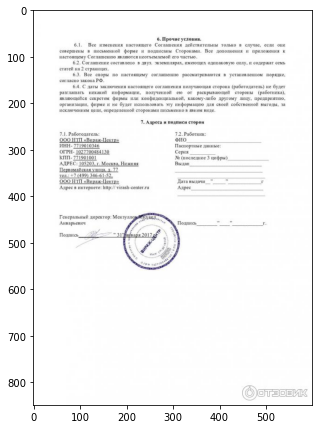

In [20]:
img = plt.imread("Dogovor/76776570.jpeg")
plt.imshow(img)

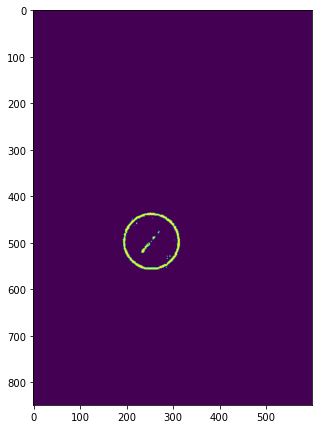

In [24]:
img2 = detect_mask_color(img,0.07)
plt.imshow(img2)

In [41]:
def DBSCAN_detect_print(input_mask):
    X = np.transpose((input_mask>250).nonzero())
    clustering = DBSCAN(eps=5, min_samples=2).fit(X)
    result = np.array(list(Counter(clustering.labels_).items()))
    #     возвращает новый список-представление dict_items
    #     пар элементов словаря dict, такой как (key, value) 
    bbox = []
    for i in result[:,0][result[:,1]>30]:
        val = X[clustering.labels_== i]
        bbox.append (list([val[:,1].min(),val[:,0].min(),val[:,1].max(),val[:,0].max()]))
    return np.array(bbox)

def detect_print (img_input, trh):
    mask = detect_mask_color(img_input, trh)
    bbox = DBSCAN_detect_print(mask)
    return bbox

In [42]:
img = plt.imread("Dogovor/76776570.jpeg")
# plt.imshow(img)

In [43]:
imres = mmcv.imrescale(img, 0.3) 
# Изменение размера изображения с сохранением соотношения сторон.
# plt.imshow(imres)

In [44]:
bbox = detect_print(imres, 0.07)

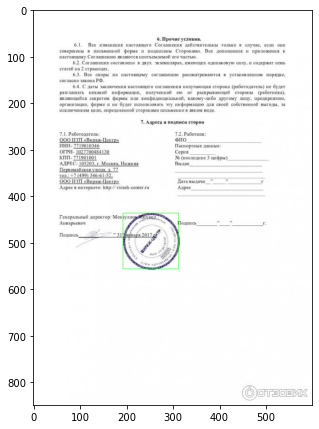

In [45]:
bbox = bbox/0.3
img = mmcv.imshow_bboxes(img, bbox, thickness=1, show=False)
plt.imshow(img)

In [46]:
path2 = "result/"
os.mkdir(path2)
for i in [i for i in os.listdir(path) if i[-3:]=="jpg"]:
    print(i)
    img = plt.imread(path+i)
    imres = mmcv.imrescale(img, 0.3)
    bbox = detect_print(imres, 0.07)
    bbox = bbox/0.3
    img = mmcv.imshow_bboxes(img, bbox, thickness=1, show=False)
    plt.imsave(path2+i,img)

012.jpg
1309357197_img384.jpg
170946_1000.jpg
17325b.jpg
189.jpg
61428004.jpg
818f54a21dbe7c7116cc44bbf385752c.jpg
82341.jpg
contract_second_page.jpg
dogovor-upravleniya-str4.jpg
IMG_20190126_00361-min_0.jpg
MS10.jpg
obrazczy-pechatej-dlya-vrachej.jpg
page3.jpg
post-59892-0-94458000-1319648407.jpg
post_5a61454c15e1c.jpg
primer_medically_stamp.jpg
shtamp1.jpg
skanirovaniye0002_90.jpg
vHv9LdKd.jpg
договор-от-30-апреля-2019г..jpg
Договор-с-Достависта-1200x1600.jpg
Медицинские-на-сайт.jpg
